In [1]:
from PIL import Image

def embed_secret_image(original_image_path, secret_image_path, output_image_path):
    # 打开原始图像和秘密图像
    original_image = Image.open(original_image_path)
    secret_image = Image.open(secret_image_path)
    
    # 调整秘密图像的大小以匹配原始图像
    secret_image = secret_image.resize(original_image.size)
    
    # 分别获取原始图像和秘密图像的像素矩阵
    original_pixels = original_image.load()
    secret_pixels = secret_image.load()
    
    # 创建输出图像
    output_image = Image.new('RGB', original_image.size)
    output_pixels = output_image.load()
    
    # 遍历每个像素并嵌入秘密信息
    for i in range(original_image.size[0]):
        for j in range(original_image.size[1]):
            # 获取原始和秘密图像的像素值
            op = original_pixels[i, j]
            sp = secret_pixels[i, j]
            
            # 将秘密图像的高4位嵌入到原始图像的低4位
            red = (op[0] & 0xF0) | (sp[0] >> 4)
            green = (op[1] & 0xF0) | (sp[1] >> 4)
            blue = (op[2] & 0xF0) | (sp[2] >> 4)
            
            # 设置输出图像的像素
            output_pixels[i, j] = (red, green, blue)
    
    # 保存输出图像
    output_image.save(output_image_path)

def extract_secret_image(embedded_image_path, output_secret_path):
    # 打开嵌入了秘密图像的原始图像
    embedded_image = Image.open(embedded_image_path)
    embedded_pixels = embedded_image.load()
    
    # 创建秘密图像
    secret_image = Image.new('RGB', embedded_image.size)
    secret_pixels = secret_image.load()
    
    # 遍历每个像素以提取秘密信息
    for i in range(embedded_image.size[0]):
        for j in range(embedded_image.size[1]):
            # 获取嵌入了秘密信息的像素值
            ep = embedded_pixels[i, j]
            
            # 提取秘密图像的高4位，并将其放置在颜色值的高4位
            red = (ep[0] & 0x0F) << 4
            green = (ep[1] & 0x0F) << 4
            blue = (ep[2] & 0x0F) << 4
            
            # 设置秘密图像的像素
            secret_pixels[i, j] = (red, green, blue)
    
    # 保存秘密图像
    secret_image.save(output_secret_path)

# 使用示例
original_image_path = 'lenna.bmp'
secret_image_path = 'parrots.bmp'
output_image_path = 'embed_image.png'  # 保存为PNG以避免有损压缩
output_secret_path = 'decode_image.png'

In [64]:
# Display functions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_image(image_path):
    """加载图像"""
    
    image = Image.open(image_path)
    # 将图像分解成R、G、B三个颜色层
    r, g, b, *_ = image.split()
    return Image.open(image_path)
    return r

def get_pixels(image):
    """获取图像的像素数据"""
    return np.array(image)

def extract_bits(pixels):
    """从每个像素中提取8个bit，并生成8个新的图像"""
    bit_images = [np.zeros(pixels.shape, dtype=np.uint8) for _ in range(8)]
    for i in range(8):
        bit_images[i] = (pixels >> i) & 1
        bit_images[i] *= 255  # 将0/1值转换为0/255以便显示
    return bit_images

def show_bit_images(images, title=''):
    """使用matplotlib显示图像列表"""
    fig, ax = plt.subplots(1, len(images), figsize=(20, 5))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
        ax[i].set_title(f'Bit {i}')
    fig.suptitle(title, fontsize=16, y=0.8)
    plt.show()

def show_images(images, title=''):
    """使用matplotlib显示图像列表"""
    fig, ax = plt.subplots(1, len(images), figsize=(10, 5))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    fig.suptitle(title, fontsize=16, y=0.9)
    plt.show()

def process_and_display_image(image_path, title=''):
    """处理图像并显示每个bit层"""
    image = load_image(image_path)
    pixels = get_pixels(image)
    bit_images = extract_bits(pixels)
    show_bit_images(bit_images, title)

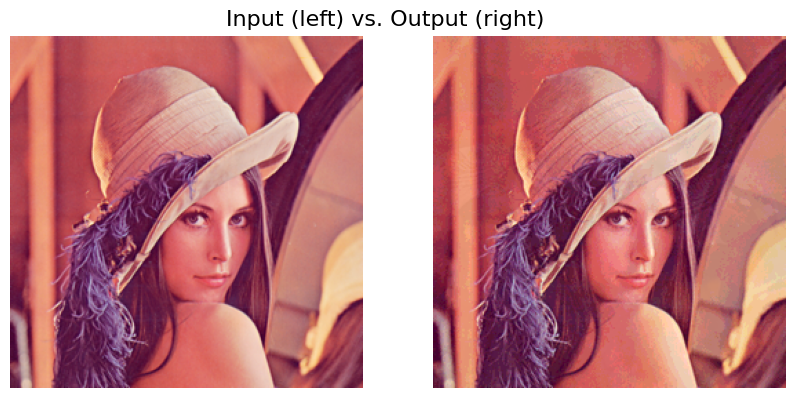

In [65]:
# 嵌入秘密图像
embed_secret_image(original_image_path, secret_image_path, output_image_path)

# 从嵌入了秘密图像的原始图像中提取秘密图像
extract_secret_image(output_image_path, output_secret_path)

# show input and output image in one plot
show_images([get_pixels(load_image(original_image_path)), get_pixels(load_image(output_image_path))], title='Input (left) vs. Output (right)')

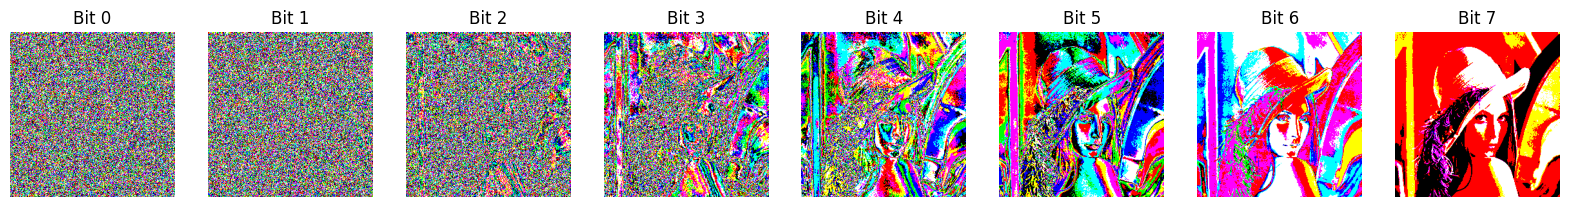

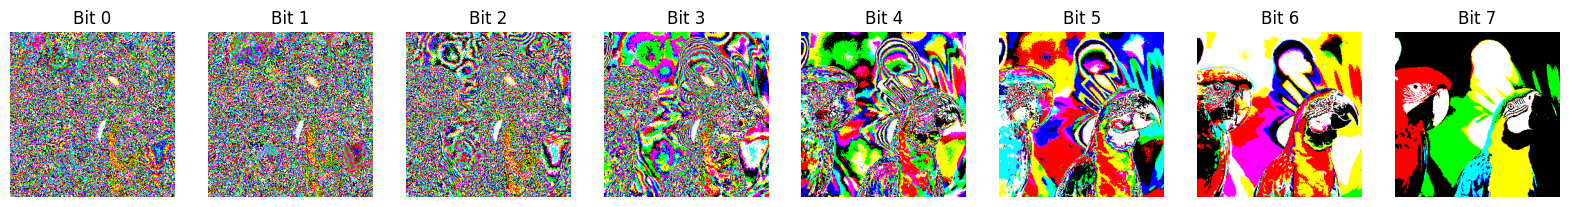

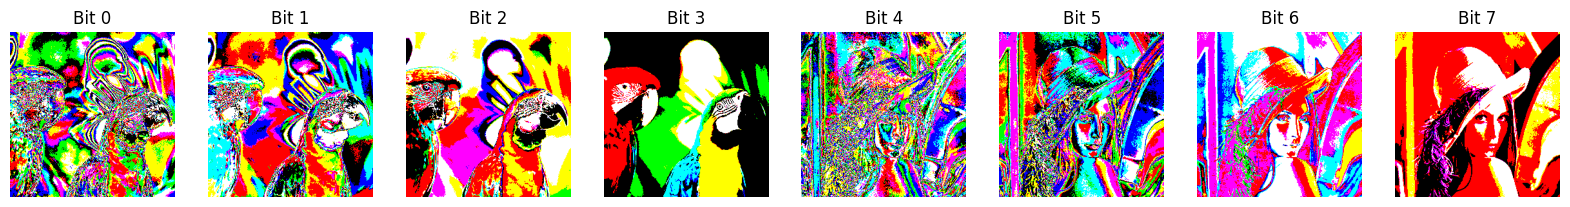

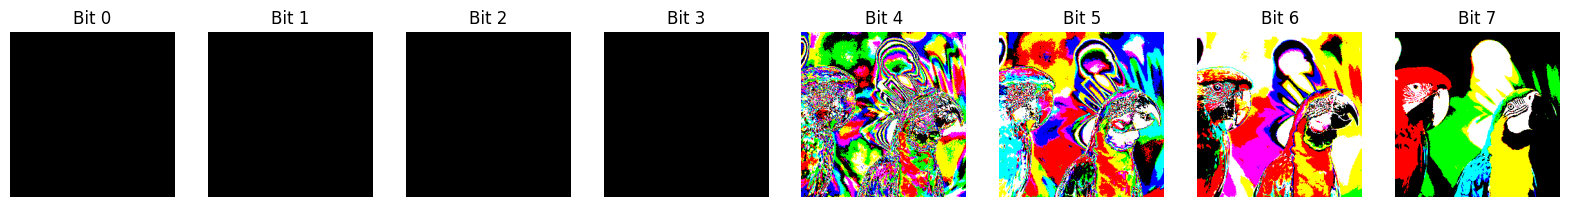

In [67]:
# 使用示例
process_and_display_image('lenna.bmp') # original image
process_and_display_image('parrots.bmp') # secret image
process_and_display_image('embed_image.png') # embeded image
process_and_display_image('decode_image.png') # extracted image